# 4 Training Models

In [1]:
import numpy as np

In [37]:
X = 2*np.random.rand(100,1)
y=4+3*X+np.random.rand(100,1)

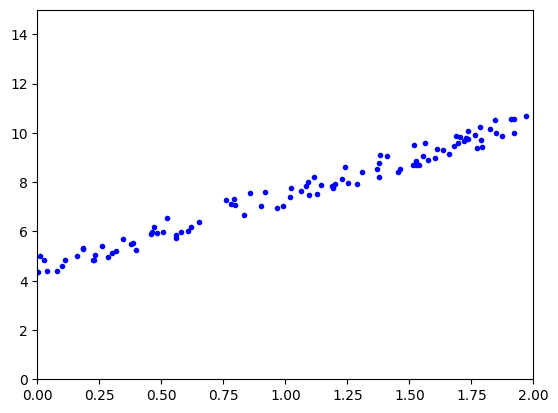

In [38]:
import matplotlib.pyplot as plt
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [39]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.4335792 ],
       [3.02977123]])

In [40]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b@theta_best
y_predict

array([[ 4.4335792 ],
       [10.49312166]])

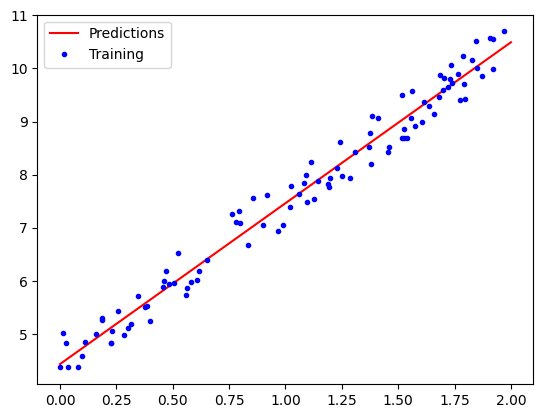

In [41]:
plt.plot(X_new,y_predict,'r-',label='Predictions')
plt.plot(X,y,'b.',label='Training')
plt.legend()
plt.show()

In [46]:
y_new = 4+3*X_new + np.random.rand(1)

In [47]:
X_new,y_predict,y_new

(array([[0],
        [2]]),
 array([[ 4.4335792 ],
        [10.49312166]]),
 array([[ 4.26301209],
        [10.26301209]]))

In [49]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_predict,y_new))

0.2025383340789914

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.4335792]), array([[3.02977123]]))

In [51]:
lin_reg.predict(X_new)

array([[ 4.4335792 ],
       [10.49312166]])

In [52]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([4.41846314]), array([3.06321726]))

## Polynomial Regression

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
m=100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 +X + 2 + np.random.randn(m,1)


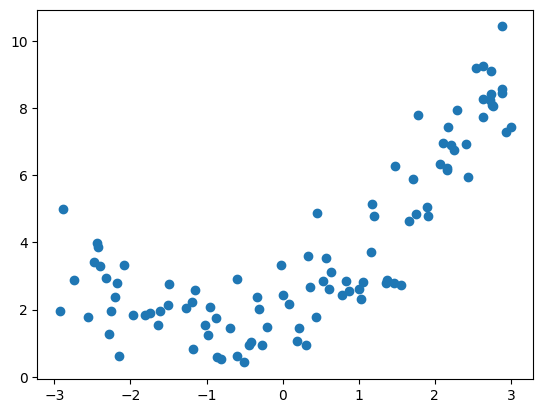

In [55]:
plt.scatter(X,y)

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)

X_poly = poly_features.fit_transform(X)

X[0],X_poly[0]

(array([-1.49476654]), array([-1.49476654,  2.23432701]))

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.95170386]), array([[0.92359283, 0.51374048]]))

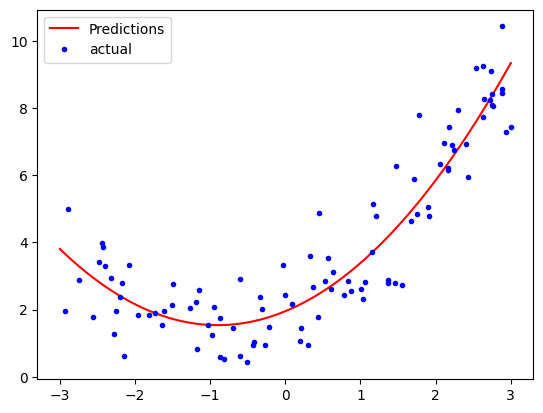

In [59]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X_new,y_new,'r-',label='Predictions')
plt.plot(X,y,'b.',label='actual')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])

        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()


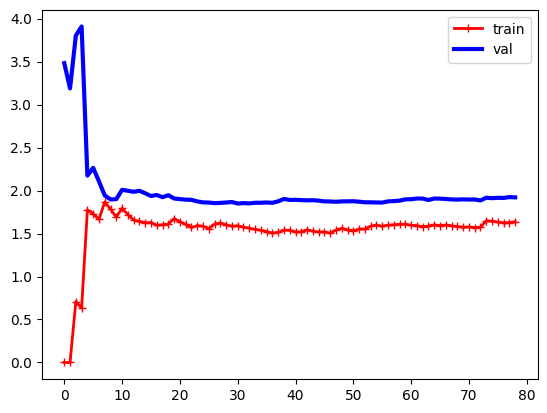

In [61]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [62]:
from sklearn.pipeline import Pipeline

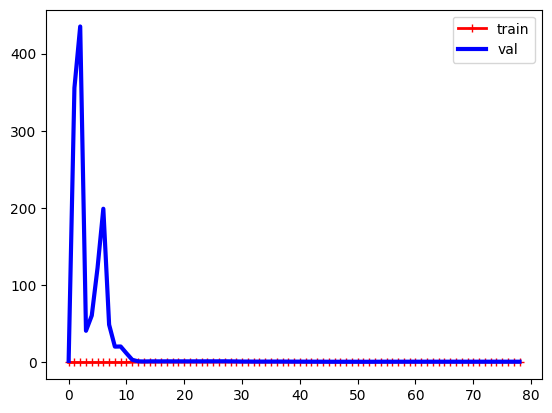

In [63]:
polynomial_regression = Pipeline([
    ('poly_fetures',PolynomialFeatures(degree=10,include_bias=False)),
    ('lin_reg',LinearRegression()),
])
plot_learning_curves(polynomial_regression, X,y)

In [20]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.85717934]])

In [21]:
from sklearn.linear_model import SGDRegressor

In [22]:
sgd_reg=SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.82355452])

In [23]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.81380596])

In [24]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [25]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
X=iris['data'][:,3:]
y=(iris['target']==2).astype(int)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

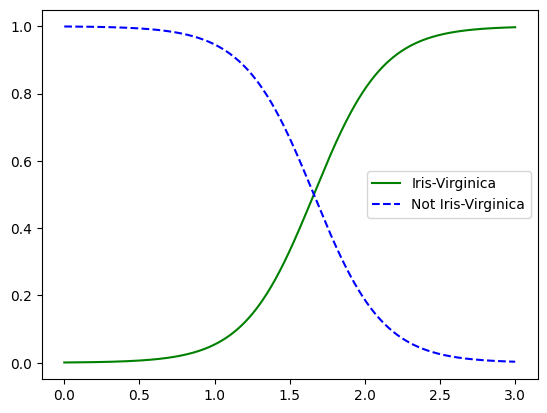

In [29]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-',label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Not Iris-Virginica')
plt.legend()

In [30]:
 log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [66]:
from sklearn.datasets import load_iris

In [67]:
iris = load_iris()

In [69]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [74]:
import pandas as pd
iris_df = pd.DataFrame(iris.data,columns= iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [75]:
target_df = pd.DataFrame(iris.target,columns = ['Target'])
target_df.head()

,Target
0,0
1,0
2,0
3,0
4,0
